# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt

# Loading dataset

In [2]:
df= pd.read_csv('kyphosis.csv') 
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

# EDA

In [3]:
df.shape

(81, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
sys.getsizeof(df)

7208

In [6]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [7]:
df.nunique()

Kyphosis     2
Age         64
Number       8
Start       16
dtype: int64

In [8]:
# checking duplicate rows
df.duplicated().sum()

0

In [9]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# Visualizations

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Kyphosis']=encoder.fit_transform(df['Kyphosis'])
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


#### Univariant

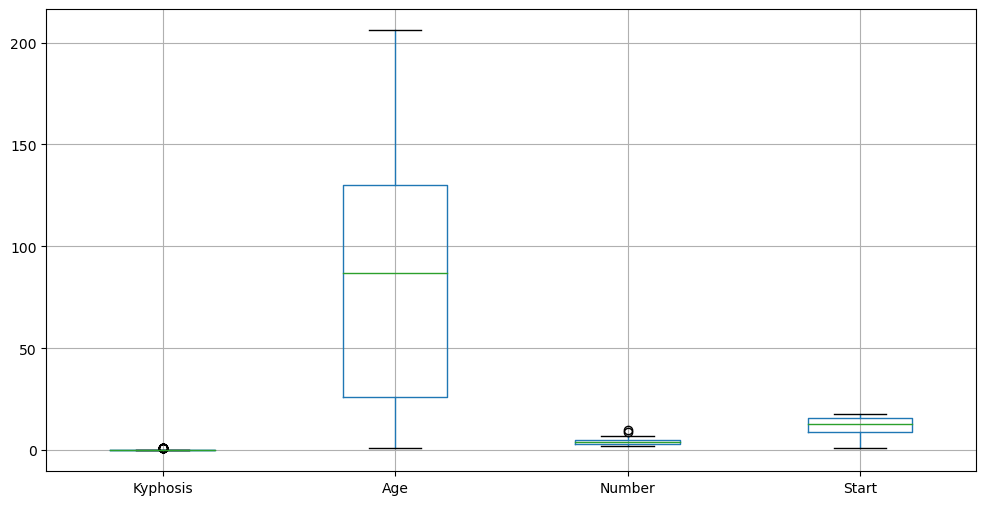

In [11]:
# Lets check outliers with boxplot
plt.figure(figsize=(12,6))
df.boxplot()
plt.show();

<Figure size 1200x600 with 0 Axes>

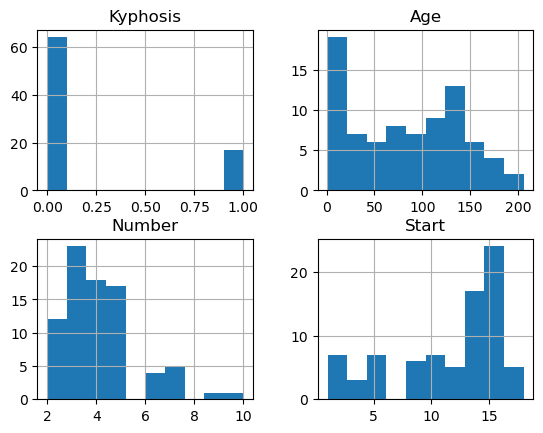

In [12]:
# lets see skewness with the help of histogram
plt.figure(figsize=(12,6))
df.hist()
plt.show();

#### Bi-Variant

<Axes: >

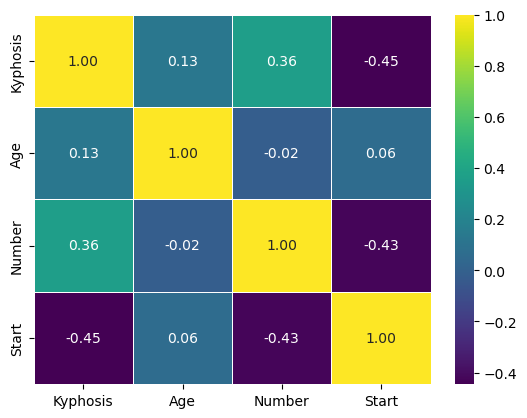

In [13]:
# Create a heatmap using seaborn
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=.5)

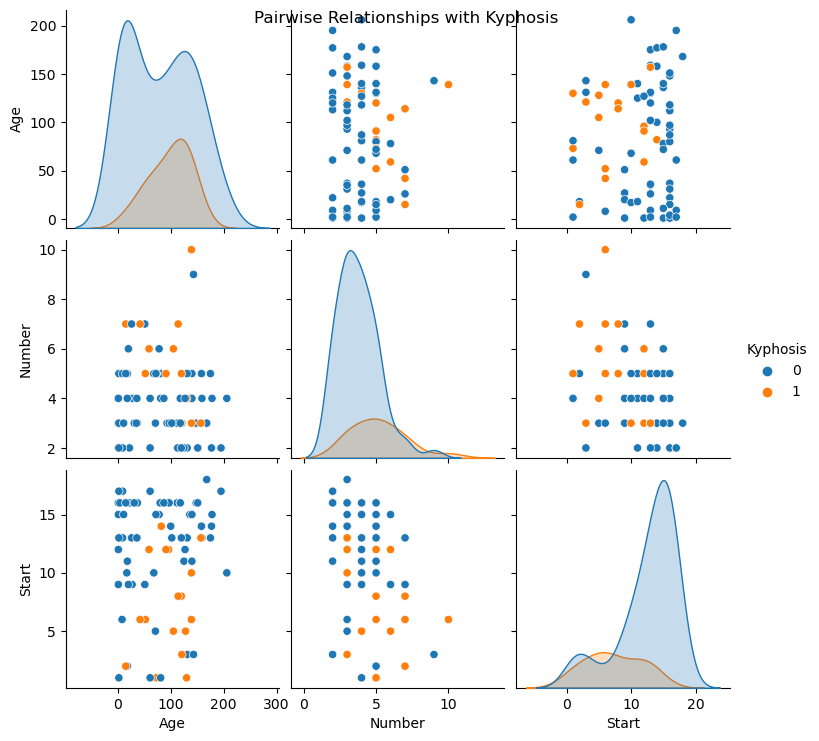

In [14]:
sns.pairplot(df, hue='Kyphosis')
plt.suptitle('Pairwise Relationships with Kyphosis')
plt.show()


In [15]:
df['Kyphosis'].value_counts() # Target column is highly imbalanced

0    64
1    17
Name: Kyphosis, dtype: int64

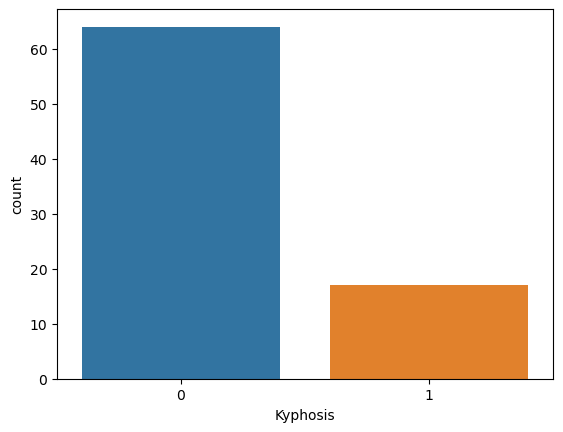

In [16]:
# for Target column
sns.countplot(x ='Kyphosis', data = df)
plt.show();

# Data Preprocessing

In [17]:
#plt.boxplot(df['Number'])
#plt.show();

In [18]:
# applying winsorization with (99% and 1%) for outliers
#upper_limit=df['Number'].quantile(0.95)
#lower_limit=df['Number'].quantile(0.05)
#df['Number']=np.where(df['Number'] >= upper_limit,upper_limit,
    #np.where(df['Number']<= lower_limit,lower_limit,df['Number']))

In [19]:
# Lets check outliers with boxplot
#plt.figure(figsize=(12,6))
#df.boxplot()
#plt.show();

In [20]:
#df.drop('Kyphosis',axis=1).skew()

In [21]:
#df['Start']=np.square(df['Start'])

In [22]:
#df['Start'].skew()

In [23]:
# Separate features (X) and target variable (y)
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
print(sys.getsizeof(X))
print(sys.getsizeof(y))

2088
468


In [24]:
#convert into into NumPy arrays for memory efficiency and faster execution,
X_np= X.to_numpy()
y_np = y.to_numpy()
# Print the size of the NumPy arrays in bytes
print(sys.getsizeof(X_np))
print(sys.getsizeof(y_np))

128
112


#### SMOTE

In [25]:
# SMOTE for imbalanced target column
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_np, y_np)

In [26]:
# Convert the NumPy array to a Pandas Series only to if target column is balanced or not
y_resampled_series = pd.Series(y_resampled)
y_resampled_series.value_counts()

0    64
1    64
dtype: int64

#### Train-test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#### Scaling
To avoid any data leakage from the test set into the training set,we will scale data after train test split

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   

4.Classification metrics
             - Score Metrics for Classification:

             - Accuracy= (TP+TN/(TP+TN+FP+FN)

             - Precision = (TP)/(TP+FP)

             - Recall = (TP)/(TP+FN)

             - f1 score - A number between 0 and 1, the harmonic mean of precision & 
               recall.

# Modeling

#### Logistic_Classification

In [29]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(multi_class= 'ovr')
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7948717948717948

In [32]:
lr.coef_

array([[ 0.96191936,  1.26193798, -2.79371267]])

In [ ]:
### Confusion matrix for logistic classification
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm= confusion_matrix(y_pred, y_test)
disp= ConfusionMatrixDisplay(cm)
disp.plot()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.76      0.76      0.76        17

    accuracy                           0.79        39
   macro avg       0.79      0.79      0.79        39
weighted avg       0.79      0.79      0.79        39



# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
accuracy_score(gnb.predict(X_test_scaled), y_test)

0.8205128205128205

# SVM

In [34]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.2, C=1.0)
svm.fit(X_train_scaled, y_train)
accuracy_score(svm.predict(X_test_scaled), y_test)

0.7692307692307693

# DT

0.7948717948717948


[Text(0.5416666666666666, 0.9, 'x[2] <= 0.676\ngini = 0.498\nsamples = 89\nvalue = [42, 47]'),
 Text(0.25, 0.7, 'x[0] <= 0.085\ngini = 0.344\nsamples = 59\nvalue = [13, 46]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 0.676\ngini = 0.274\nsamples = 55\nvalue = [9, 46]'),
 Text(0.16666666666666666, 0.3, 'x[0] <= 0.405\ngini = 0.233\nsamples = 52\nvalue = [7, 45]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.1, 'gini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.5, 0.3, 'x[1] <= 0.188\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.7, 'x[2] <= 0.735\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.75, 0.5, 'x[0] <= 0.695\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.6666666666

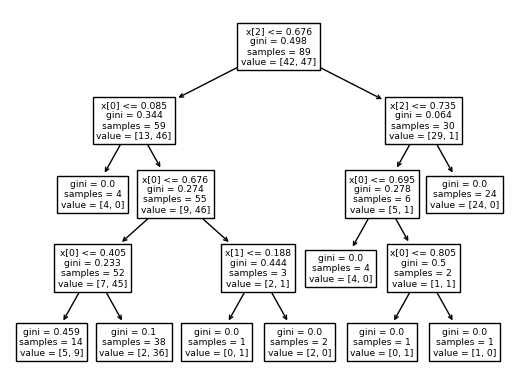

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc= DecisionTreeClassifier(max_depth = 4, criterion='gini')
dtc.fit(X_train_scaled, y_train)
print(accuracy_score(dtc.predict(X_test_scaled), y_test))
tree.plot_tree(dtc)

# RF

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth = 5, n_estimators= 10)
rfc.fit(X_train_scaled, y_train)
print(accuracy_score(rfc.predict(X_test_scaled), y_test))

0.8205128205128205


# Grid_search_cv

In [48]:
### Hyperparametric tuning using gridsearchcv()
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(2, 12)), 'n_estimators': [10,50,100,150,200]}]
model_cv = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

model_cv.fit(X_train_scaled, y_train)
cv=model_cv.predict(X_test_scaled)
print(accuracy_score(cv, y_test))

0.8717948717948718


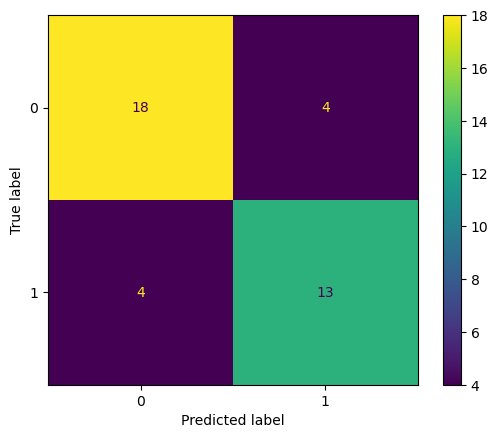

In [41]:
from sklearn.metrics import classification_report
print(classification_report(cv,y_test))